## Reading Files into Python

# Exploratory Data Analysis


In [41]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [44]:
#Importing data
df_1 = pd.read_csv('C:\\Users\\dines\\Downloads\\Myntra Project\\product details.csv')
df_2 = pd.read_csv('C:\\Users\\dines\\Downloads\\Myntra Project\\products catalog.csv')

## Data Information

### There are 2 csv files that are shared here.

**A.	Product Details**
   
*	ProductID – ID assigned to the product
*	ProductName – Name of the Product
*	ProductBrand – Brand Name of the Product


In [45]:
df_1.head()

,ProductID,ProductName,ProductBrand
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx


**B.	Products Catalog**

*	Gender – gender to which specific products that have been designed
*	Price (INR) – Price of the products
*	NumImages  – Number of images that have been clicked for specific product
*	ID - ID assigned to the product
*	Description – full details of the product
*	PrimaryColor – Color of the product


In [46]:
df_2.head()

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown


In [47]:
data = pd.merge(left = df_1,right = df_2, how = 'inner', left_on = 'ProductID', right_on = 'ID')

In [48]:
data.drop('ID',axis = 1, inplace  = True)

In [49]:
data

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White
...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN


In [50]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(12491, 8)

In [17]:
#Printing all the columns present in data
data.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

## Variable Identification and Typecasting


In [18]:
# A closer look at the data types present in the data
data.dtypes

ProductID        int64
ProductName     object
ProductBrand    object
Gender          object
Price (INR)      int64
NumImages        int64
Description     object
PrimaryColor    object
dtype: object

There are a lot of variables visible at one, so let's narrow this down by looking **at one datatype at once**. We will start with int


### Integer Data Type


In [19]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

ProductID      int64
Price (INR)    int64
NumImages      int64
dtype: object

Summary:

*    **ProductID, Price (INR),NumImages** are a unique number assigned to products. It is **Okay as Integer**.


In [40]:
# typecasting "gender", "PrimaryColor" and "ProductBrand" to category type
data['Gender'] = data['Gender'].astype('category')
data['ProductBrand'] = data['ProductBrand'].astype('category')
data['PrimaryColor'] = data['PrimaryColor'].astype('category')

*	There is a PrimaryColor column in Data that needs string strip operation. that contains some white spaces in it 

In [39]:
data.dtypes

ProductID          int64
ProductName       object
ProductBrand    category
Gender          category
Price (INR)        int64
NumImages          int64
Description       object
PrimaryColor    category
dtype: object

In [21]:
data.PrimaryColor = data.PrimaryColor.apply(lambda string: string.strip())

In [22]:
data.PrimaryColor

0        Black
1        Beige
2         Pink
3         Blue
4        White
         ...  
12486    Black
12487     Gold
12488     Blue
12489      NaN
12490    Black
Name: PrimaryColor, Length: 12491, dtype: category
Categories (27, object): ['Beige', 'Black', 'Bronze', 'Brown', ..., 'Silver', 'White', 'Yellow', 'Blue']

In [23]:
# finding number of missing values in every variable
data.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

In [24]:
# 894 missing values in PrimaryColor variable. we replace the missing value by ‘Others’
data.PrimaryColor = data.PrimaryColor.cat.add_categories('Others')
data.PrimaryColor.fillna('Others', inplace = True)

In [25]:
data.isnull().sum()

ProductID       0
ProductName     0
ProductBrand    0
Gender          0
Price (INR)     0
NumImages       0
Description     0
PrimaryColor    0
dtype: int64

*	Since all the column names are single word so we can convert the ‘Price (INR)’ also to single name ‘Price’.

In [26]:
data.rename(columns = {"Price (INR)":'Price','Gender':'Gender_Cat'}, inplace = True)

*	**We have to create a new Column “Gender” to analyse further. Going forward we will consider below groups for Logic Applied**

i.	Include Boys & Men as **Men**

ii.	Include Girls & Women as **Women**

iii.	Include Unisex & Unisex Kids as **Unisex**


In [27]:
data['Gender'] = ['Men' if x in ('Boys','Men') else 'Women' if x in ('Women','Girls')  else 'Unisex' for x in data.Gender_Cat]
data['Gender'] = data['Gender'].astype('category')

## Univariate Analysis: Numerical Variables


In [28]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64']).dtypes

ProductID    int64
Price        int64
NumImages    int64
dtype: object

In [29]:
num_var = ['ProductID', 'Price', 'NumImages']

In [30]:
# function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (5*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

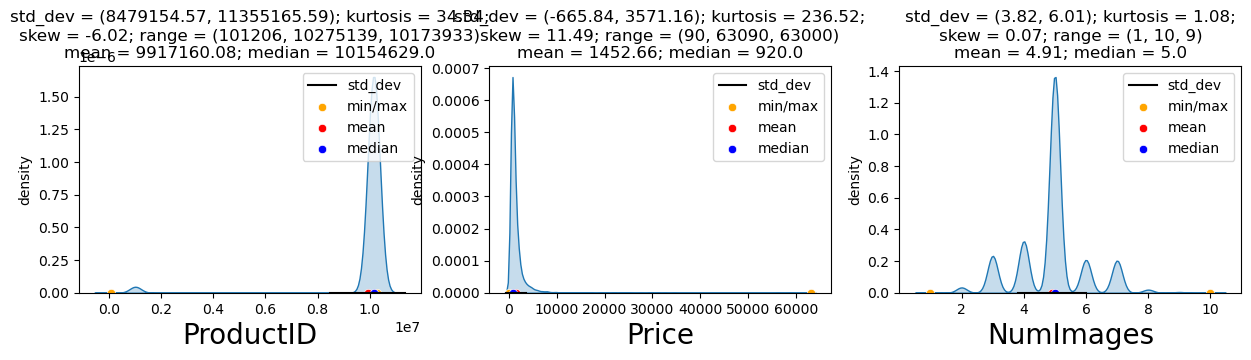

In [31]:
UVA_numeric(data, num_var)

**Summary**
*    **Price**:
    *    most of the product price is less than 2000.
    *    There are some product whos price is more than 60000.

*   **NumImages**: Most of the products has 5 images.

## Univariate Analysis : Categorical Varibales


In [32]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

ProductName       object
ProductBrand    category
Gender_Cat      category
Description       object
PrimaryColor    category
Gender          category
dtype: object

In [33]:
def UVA_category(data, var_group, top = None):

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi = 100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)[:top]
        n_uni = data[i].nunique()

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count, norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

##      List of investigation to perform under this.

**1.  Which product brand have most product in Market/ Which brand attracts customers to make purchase?**

**2.  Are women buys the product most?**

**3.  Which color is mostly used for products/ most favorite color?**

## 1. Which product brand have most product in Market/ Which brand attracts customers to make purchase?

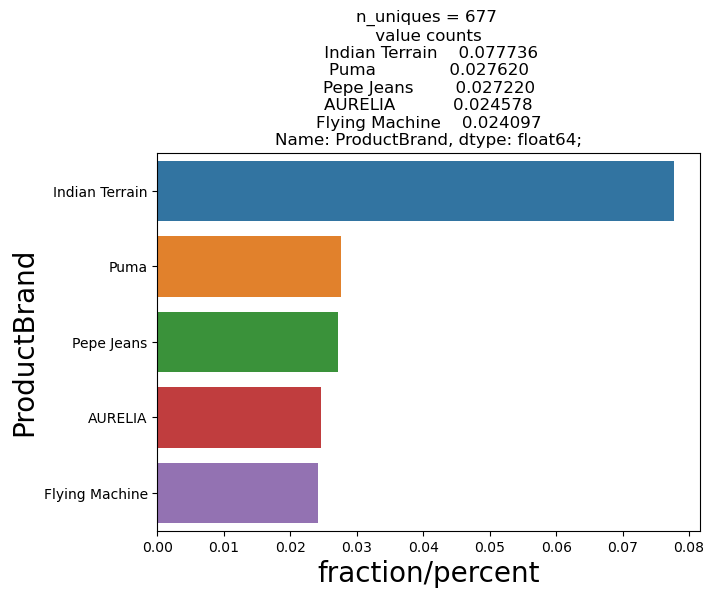

In [34]:
UVA_category(data,['ProductBrand'],5)

### Result
    
**The brand Indian Terrain is have most product in and this brand attracts more customers to make purchase with market share of 7.7% followed by Puma(2.7%), Pepe Jeans(2.7%)**
    


# 2. Are women buys the product most?

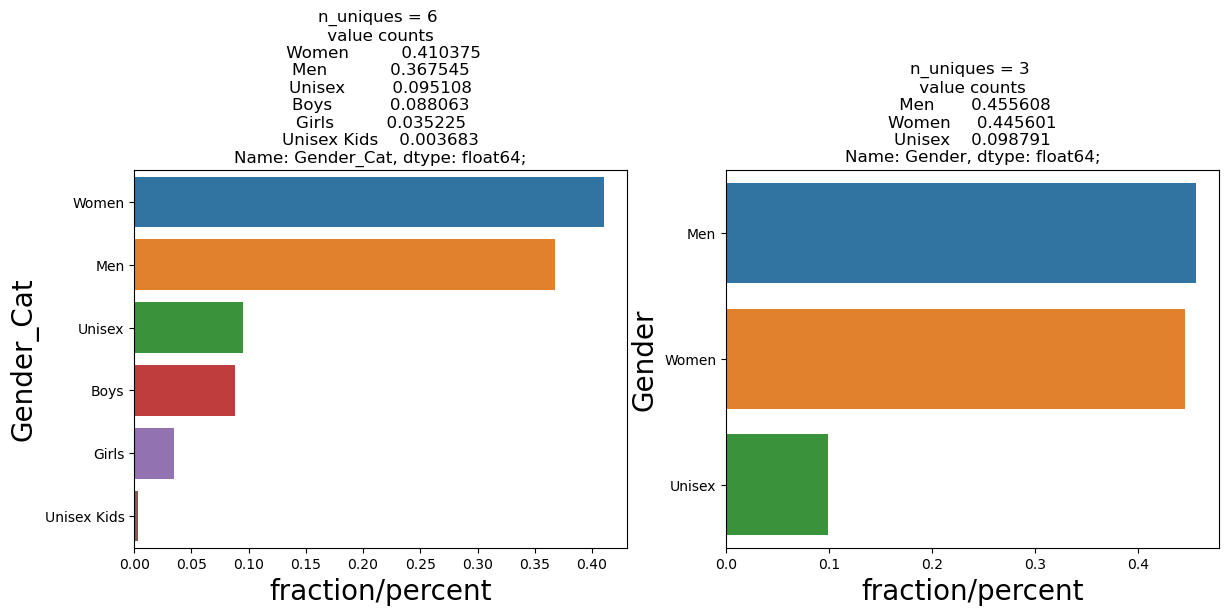

In [32]:
UVA_category(data,['Gender_Cat','Gender'])

### Result:

***Yes womens buy most product when we talk about gender category,
but if we talk about Genders then the Mens product are most.***

# 3. Which color is mostly used for products/ most favorite color?

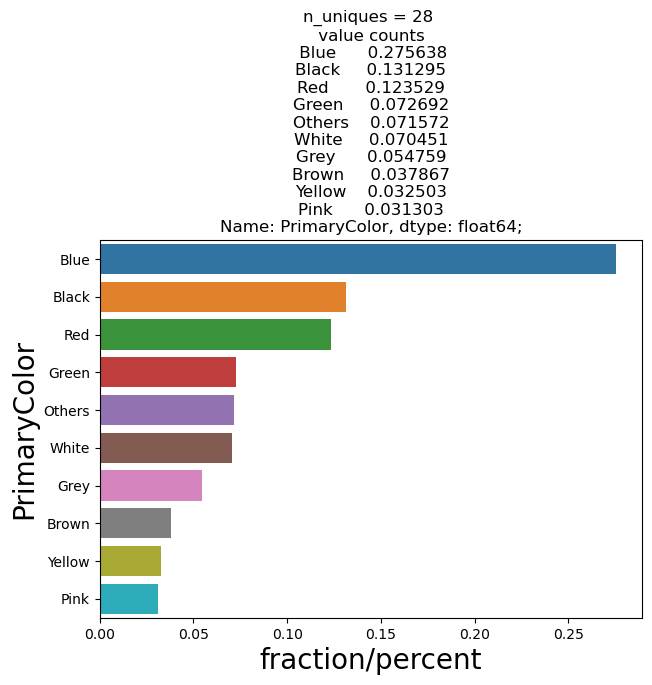

In [33]:
UVA_category(data,['PrimaryColor'],10)

### Result:

**Blue attracts more customers to make purchase, more than 25% products are blue colore as a primary color .
followed by Black(13%) and Red(12%), etc.**

## Bivariate Analysis : Numerical-Numerical


In [34]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64'])
numerical.dtypes

ProductID    int64
Price        int64
NumImages    int64
dtype: object

In [35]:
# calculating correlation
correlation = numerical.corr()
correlation

,ProductID,Price,NumImages
ProductID,1.000000,-0.015126,0.058085
Price,-0.015126,1.000000,0.127023
NumImages,0.058085,0.127023,1.000000


## Bivariate : Categorical-Categorical


##      List of investigation to perform under this combination.

**1.  Which color attracts which customers to make purchase?**


In [36]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variables,
    prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]
    
    ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True',figsize = (15,6),title=str(ax1))


# 1. Which color attracts which customers to make purchase?

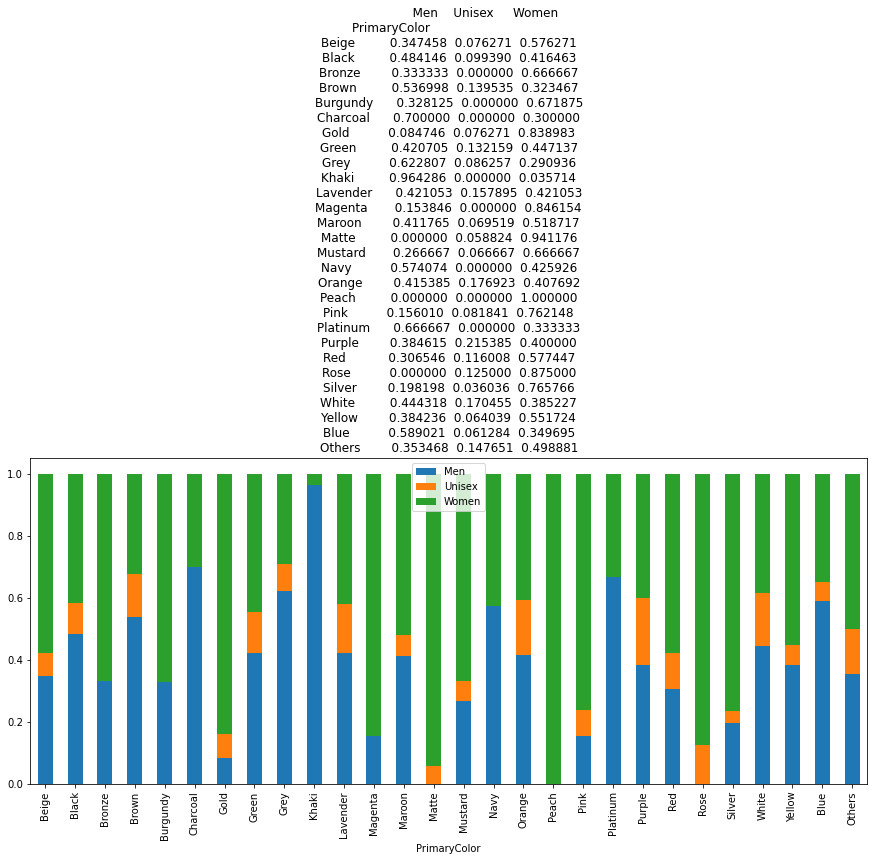

In [37]:
BVA_categorical_plot(data, 'Gender', 'PrimaryColor')

### Result:

**Khaki color attracts Men to make purchase, Peach color attracts Women most to make purchase and Orange attracts Unisex.**

## Bivariate Analysis: Continuous-Categorical variables

### List of Hypothesis and investigation to perform under this combination.

**1.  What is the average price which attracts which gender to make purchase?**

**2.  What is the average price which attracts which gender(Category wise) to make purchase?**

**3.  What is the average price of popular brands that attracts customers to make purchase.?**

In [38]:
def Bivariate_cont_cat(data, cont, cat): 
    #calculating descriptives
    m = []
    for cate in list(data[cat].unique()):
        #creating samples
        x = data[cont][data[cat]==cate][:].mean()
        m.append(x)
    
    
    #table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
    #plotting
    plt.figure(figsize = (15,6), dpi=140)
    
    #barplot
    plt.subplot(1,2,1)
    sns.barplot(data[cat].unique(), m)
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('{}'.format(table))

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('categorical boxplot')
  


## 1. What is the average price which attracts which gender to make purchase?

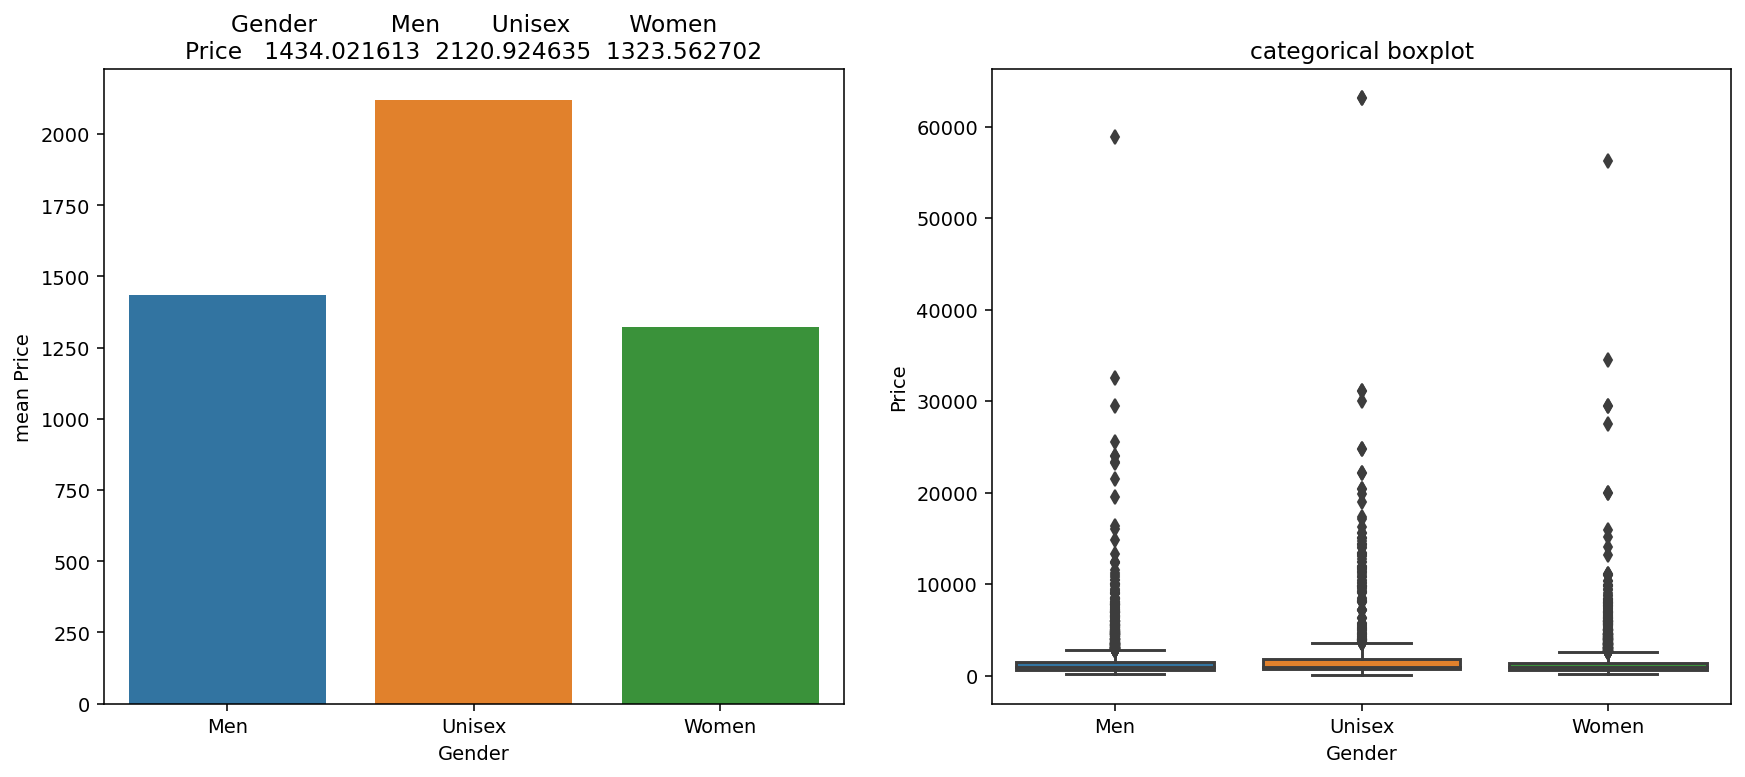

In [39]:
Bivariate_cont_cat(data, 'Price', 'Gender')

### Inferences:

**Boxplot shows very similar distribution as bar chart with outliers on the upper end (we can't consider them as outliers because some products have prices in that range).**

### Result:

**The average price for Unisex Products is Rs.2120 which is highest among the all genders, Followed by Men's product (Rs.1434) and women's product(Rs.1323)**

## 2. What is the average price which attracts which gender(Category wise) to make purchase?

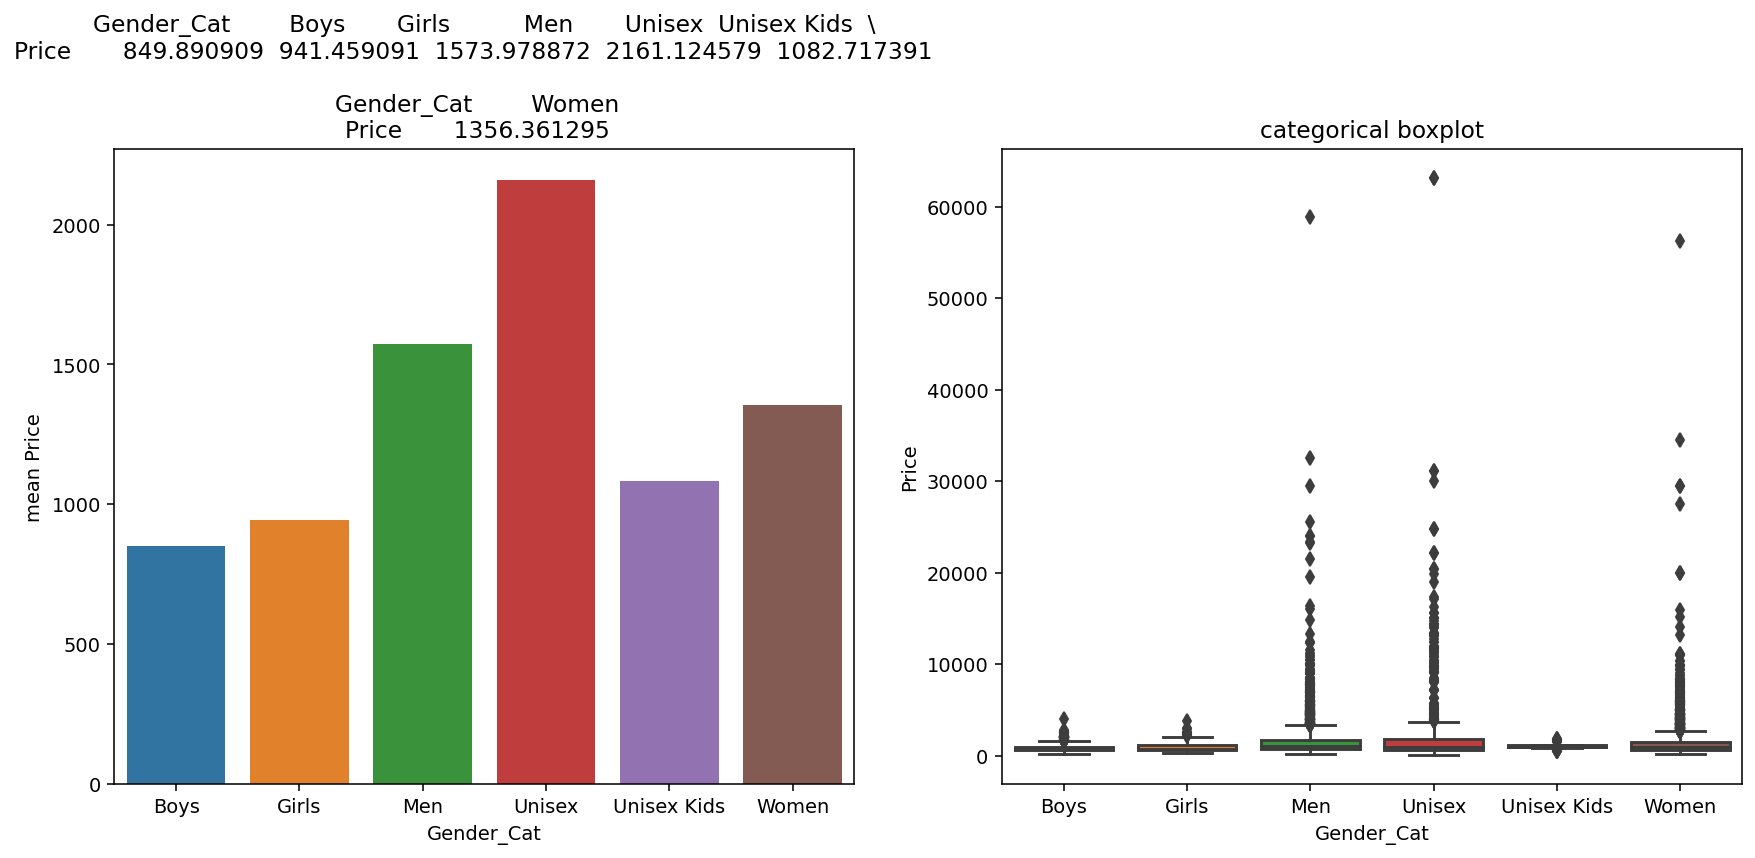

In [40]:
Bivariate_cont_cat(data, 'Price', 'Gender_Cat')

### Inferences:
**1.  There is a small difference between the prices of boy's and girl's Products.**

**2.  Boxplot shows a very similar distribution as the bar chart with outliers on the upper end (we can't consider them as outliers because some products have prices in that range).**

**3.  From Boxplot we can see the price of kids' products is not high as the price of adult products.**

### Result:

**The average price for Unisex(adults) Products is Rs.2161 which is highest among the all genders, Followed by Men's product (Rs.1573), women's products(Rs.1356), unisex kid's products(Rs.1082), girl's products(Rs.941), boy's products(Rs.849).**

In [41]:
def Bivariate_cont_cat_(data, cont, cat,top = None): 
    #calculating descriptives
    data1 = data[data['ProductBrand'].isin(list(dict(data[cat].value_counts(normalize = True)[:top]).keys()))]
    m = []
    for cate in list(data1[cat].unique()):
        #creating samples
        x = data1[cont][data1[cat]==cate][:].mean()
        m.append(x)
    
    
    #table
    table = pd.pivot_table(data=data1, values=cont, columns=cat, aggfunc = np.mean)
    #plotting
    plt.figure(figsize = (17,7), dpi=140)
    
    #barplot
    plt.subplot(1,2,1)
    g = sns.barplot(list(data1[cat].unique()), m)
    g.set_xticklabels(
    labels=list(data1[cat].unique()), rotation=44)
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('{}'.format(table))
    

## 3. What is the average price of popular brands that attracts customers to make purchase.??

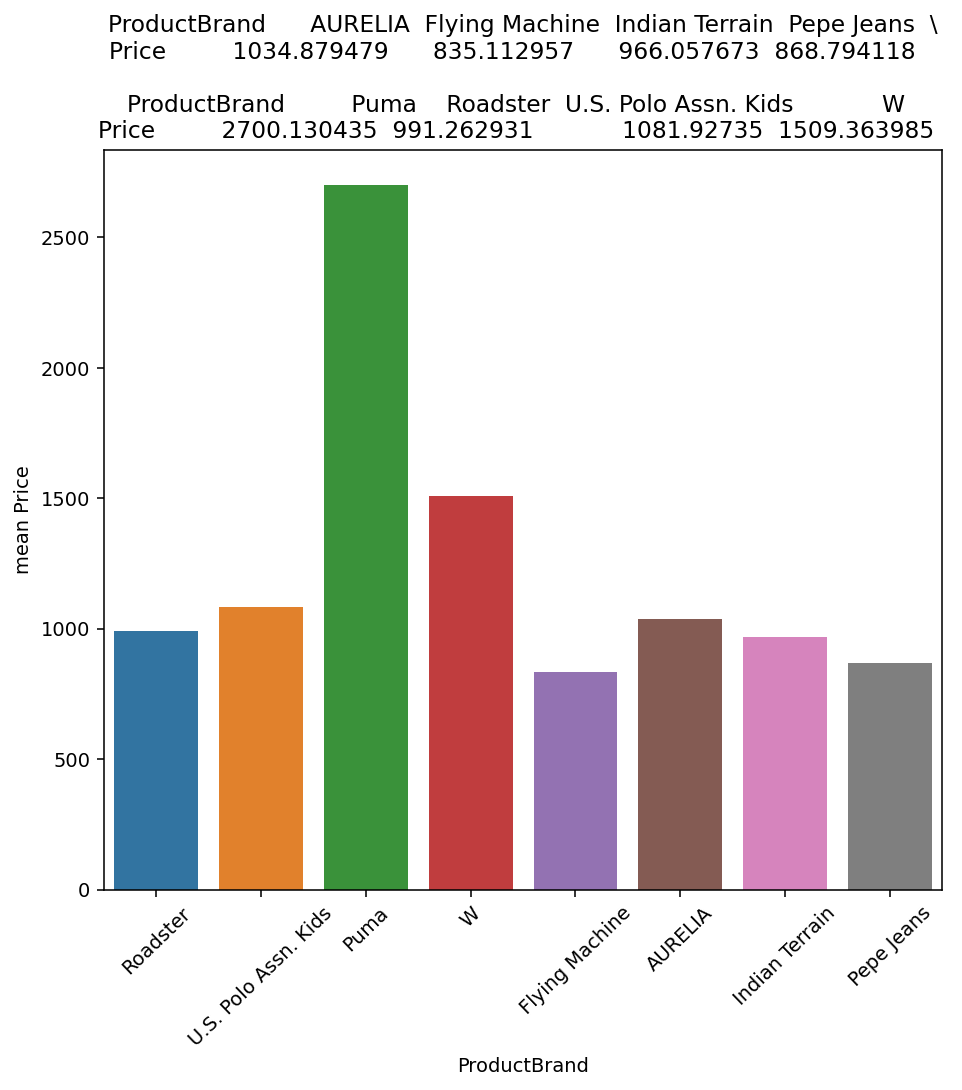

In [42]:
Bivariate_cont_cat_(data, 'Price', 'ProductBrand',8)

### Result:

**The Average price of Puma brand is highest among all the products that is Rs.2700. The most polpular brand Indian Terrain on the 6th possion with average price of Rs.966.**